<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [1]:
Student_Name = "Amirhossein Zahedi"
Student_ID = "99101705"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Amirhossein Zahedi
Student_ID: 99101705


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

**Hippocampus** : The sparse nature of memory ensembles is emerging as a striking feature across multiple subregions of the hippocampus and indicates that a small group of active cells are not only sufficient to encode specific features of the internal and external environment, but can also drive recall and generate adaptively learnt behaviors. Although beyond the scope of this review, neuromodulatory input has been also shown to mediate feature selectivity in hippocampal microcircuits. Increasing experimental evidence suggests that a common mechanism allows hippocampal ensembles to flexibly shift their coding sequences to perform operations related to episodic, spatial, and contextual encoding. The present findings indicate that normal rats can integrate “what,” “where,” and “when” information to remember the order of a sequence of events, and that the hippocampus is critical to this kind of memory. Normal rats used a combination of odor and place cues to guide judgments about temporal order. <br>
Zemla, Roland, and Jayeeta Basu. "Hippocampal function in rodents." Current opinion in neurobiology 43 (2017): 187-197. <br>
Ergorul, Ceren, and Howard Eichenbaum. "The hippocampus and memory for “what,”“where,” and “when”." Learning & Memory 11.4 (2004): 397-405.

**Medial prefrontal cortex** : The medial prefrontal cortex (mPFC) has been associated with diverse functions including attentional processes, visceromotor activity, decision making, goal directed behavior, and working memory. With a few exceptions, there are few projections from the hypothalamus to the dorsal or ventral mPFC. Accordingly, subcortical limbic information mainly reaches the mPFC via the midline thalamus and basal nuclei of amygdala. As discussed herein, based on patterns of afferent (as well as efferent) projections, PL is positioned to serve a direct role in cognitive functions homologous to dorsolateral PFC of primates, whereas IL appears to represent a visceromotor center homologous to the orbitomedial PFC of primates. The mPFC of rats consists of four main divisions which from dorsal to ventral are the medial agranular (AGm) (or medial precentral), the AC (dorsal and ventral divisions), the PL and the IL. The various subdivisions of the mPFC appear to serve separate and distinct functions. <br>
Hoover, Walter B., and Robert P. Vertes. "Anatomical analysis of afferent projections to the medial prefrontal cortex in the rat." Brain Structure and Function 212 (2007): 149-179. <br>
Vertes, Robert P. "Interactions among the medial prefrontal cortex, hippocampus and midline thalamus in emotional and cognitive processing in the rat." Neuroscience 142.1 (2006): 1-20.

**Olfactory tubercle** : In rats, the olfactory tubercle is a brain region located in the ventral striatum that is involved in processing olfactory information and regulating reward-related behaviors. While its precise functions are not fully understood, the olfactory tubercle is believed to play a role in integrating olfactory sensory input with emotional and motivational signals, particularly related to food and social interactions. Studies have suggested that the olfactory tubercle may contribute to the evaluation of odors' hedonic value and the formation of odor-associated memories. The rat olfactory tubercle was studied with the rapid Golgi method. Several distinct cell types were identified mainly on the basis of the size of their somata and the structure of their dendrites. The commonest neuron type in the tubercle is the medium sized densely spined cell. The somata of these neurons occur chiefly in the dense cell and multiform layers. They also form the cell bridges that directly link the olfactory tubercle with the nucleus accumbens and caudate-putamen. <br>
Millhouse, O. E., and Lennart Heimer. "Cell configurations in the olfactory tubercle of the rat." Journal of Comparative Neurology 228.4 (1984): 571-597.

# Import Libraries

In [2]:
#%pip install pymatreader
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#import pymatreader
import scipy as sp
import pandas as pd
import math

#################################
# Import your necessary libraries
#################################

# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`* 

In [3]:
data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC','events']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event

###########################################################
# TO DO: Import the data and add it to the main *data dict 
mainData = sp.io.loadmat('data.mat')
data['channel_Data'] = mainData['channelData']
###########################################################


# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

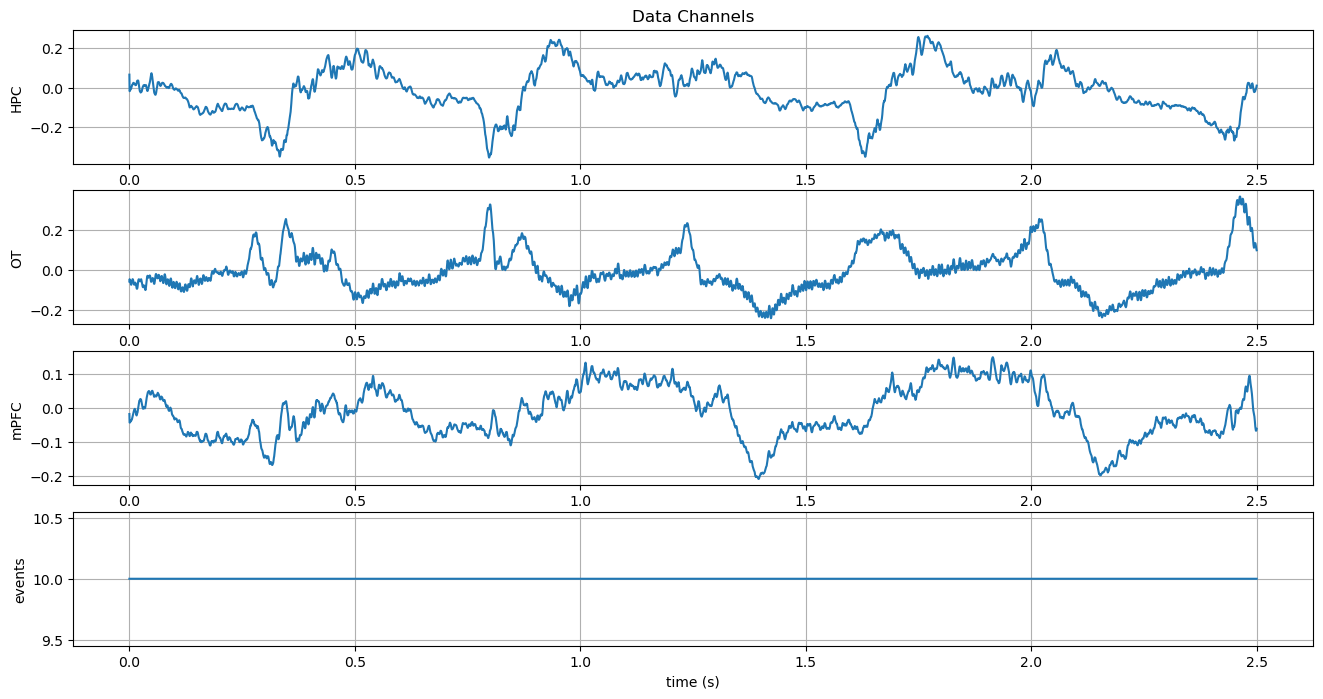

In [4]:

#################################################
# TO DO: plot the raw LFP signal for each channel.
length = int(2.5*data['srate'])
time = np.linspace(0,2.5,length)
plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(4,1,i+1)
    if i == 0:
        plt.title("Data Channels")
    plt.plot(time,data['channel_Data'][0:length,i])
    plt.ylabel(data['channel_names'][i])
    if i == 3:
        plt.xlabel("time (s)")
    plt.grid('True')

#################################################


# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [5]:
def calc_PSD(data):
    
    ##############################
    # TO DO: Complete the function
    N = len(data['channel_Data'][:,0])
    data_fft = np.zeros((N,4))
    for i in range(4):
        data_fft[:,i] = np.fft.fftshift(np.fft.fft(data['channel_Data'][:,i],))
    f = np.linspace((-N/2)*data['srate']/N,(N/2+1)*data['srate']/N,N)
    
    return f,data_fft
    ##############################

C:\Users\Zahedi\AppData\Local\Temp\ipykernel_9860\2076828200.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  data_fft[:,i] = np.fft.fftshift(np.fft.fft(data['channel_Data'][:,i],))


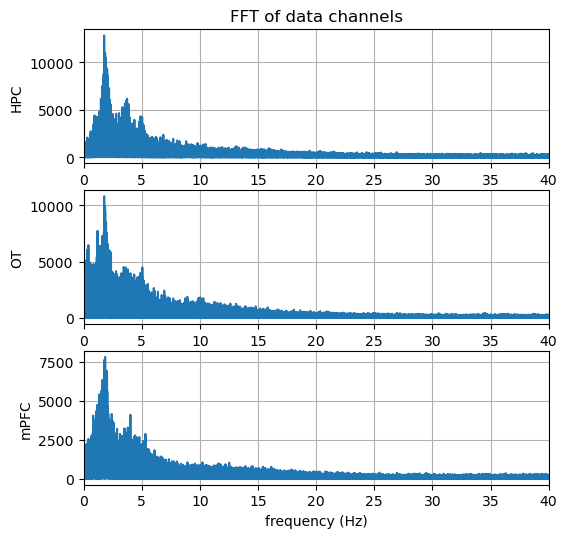

In [6]:

####################################################################
# To Do: Use your function to calculate the PSD and plot the results
f,data_fft = calc_PSD(data)
plt.figure(figsize=(6,8))
for i in range(3):
    plt.subplot(4,1,i+1)
    if i == 0:
        plt.title("FFT of data channels")
    plt.plot(f,abs(data_fft[:,i]))
    plt.ylabel(data['channel_names'][i])
    if i == 2:
        plt.xlabel("frequency (Hz)")
    plt.xlim(0,40)
    plt.grid('True')
####################################################################


Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

<function matplotlib.pyplot.show(close=None, block=None)>

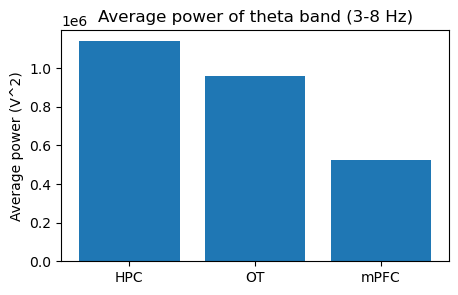

In [7]:

##################################################
# TO DO: Plot the theta band power of each channel

# Finding average powers
average_power = []
N = len(data_fft[:,0])
k_start = round(N/2 + N*3/data['srate'])
k_end = round(N/2 + N*8/data['srate'])
for i in range(3):
    average_power.append(np.mean( pow(abs(data_fft[k_start:k_end,i]),2)))
    
# Plotting
plt.figure(figsize=(5,3))
plt.bar(data['channel_names'][0:3],average_power)
plt.ylabel("Average power (V^2)")
plt.title("Average power of theta band (3-8 Hz)")
plt.show

##################################################


The plot should be like this: <br>

![](./Figures/01.png)

`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

<span style="color:pink">
The processing of spatial and mnemonic information is believed to depend on hippocampal theta oscillations (5–12 Hz). However, in rats both the power and the frequency of the theta rhythm are modulated by locomotor activity, which is a major confounding factor when estimating its cognitive correlates. Previous studies have suggested that hippocampal theta oscillations support decision-making processes. In addition, theta activity was higher during decision periods preceding correct choices than during decision periods preceding incorrect choices. Altogether, data support a cognitive function for the hippocampal theta rhythm in spatial decision making.

# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

In [8]:
def BPF_filter(data,frq_low,frq_high,filt_order):
    
    ##############################
    # To Do: complete the function
    fs = data['srate'];
    N = len(data['channel_Data'][:,0])
    filtered_data = np.zeros((N,4))
    [b,a] = sp.signal.butter(filt_order, [frq_low/ (fs/2) , frq_high/ (fs/2)], btype='band')
    for i in range(3):
        filtered_data[:,i] = sp.signal.filtfilt(b,a,data['channel_Data'][:,i])
    return filtered_data
    ##############################
    
data_filtered = BPF_filter(data=data,frq_low=0.5,frq_high=128,filt_order=4)
data_filtered[:,3] = data['channel_Data'][:,3]

Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [9]:
def epoch_data(data, time_interval):
    ##############################
    # To Do: complete the function
    events = data[:,3]
    channelData = data[:,0:3]
    start_times_banana = []
    start_times_lime = []
    trials_number_banana = 0;
    trials_number_lime = 0;
    
    for i in range(len(events)-1):
        if events[i] == 0 and events[i+1] == 20:
            start_times_banana.append(i+1)
            trials_number_banana = trials_number_banana + 1
            
        if events[i] == 0 and events[i+1] == 40:
            start_times_lime.append(i+1)
            trials_number_lime = trials_number_lime + 1
            
    #print(trials_number_banana)
    #print(trials_number_lime)
    length = time_interval[1] - time_interval[0]
    trials_banana = np.zeros((trials_number_banana,length,3))
    trials_lime = np.zeros((trials_number_lime,length,3))
    for i in range(trials_number_banana):
        trials_banana[i] = channelData[start_times_banana[i] + time_interval[0] : start_times_banana[i] + time_interval[1] ,0:3]
    for i in range(trials_number_lime):
        trials_lime[i] = channelData[start_times_lime[i] + time_interval[0] : start_times_lime[i] + time_interval[1] ,0:3]
    ##############################

    data_epoched = {}
    data_epoched['data_Banana'] = trials_banana
    data_epoched['data_Lime'] = trials_lime

    return data_epoched


def z_score_data(data_epochs):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    numTrials_banana = len(data_epochs['data_Banana'])
    numTrials_lime = len(data_epochs['data_Lime'])
    mean_epochs_banana = np.zeros((numTrials_banana,3))
    mean_epochs_lime = np.zeros((numTrials_lime,3))
    std_trials_banana = np.zeros((numTrials_banana,3))
    std_trials_lime = np.zeros((numTrials_lime,3))
    data_epochs_z_banana = np.zeros((numTrials_banana,len(data_epochs['data_Banana'][0,:,0]),3))
    data_epochs_z_lime = np.zeros((numTrials_lime,len(data_epochs['data_Banana'][0,:,0]),3))
    for j in range(3):
        for i in range(numTrials_banana):
            mean_epochs_banana[i,j] = np.mean(data_epochs['data_Banana'][i,:,j])
            std_trials_banana[i,j] = np.std(data_epochs['data_Banana'][i,:,j])
            data_epochs_z_banana[i,:,j] = (data_epochs['data_Banana'][i,:,j] - mean_epochs_banana[i,j]) / std_trials_banana[i,j]
            
        for i in range(numTrials_lime):
            mean_epochs_lime[i,j] = np.mean(data_epochs['data_Lime'][i,:,j])
            std_trials_lime[i,j] = np.std(data_epochs['data_Lime'][i,:,j])
            data_epochs_z_lime[i,:,j] = (data_epochs['data_Lime'][i,:,j] - mean_epochs_lime[i,j]) / std_trials_lime[i,j]
    
    data_epoched_z = {}
    data_epoched_z['data_Banana'] = data_epochs_z_banana
    data_epoched_z['data_Lime'] = data_epochs_z_lime 

    return data_epoched_z
    #############################


data_epochs = epoch_data(data_filtered,[int(-1.5*data['srate']),int(3*data['srate'])])
data_epochs_z = z_score_data(data_epochs)

# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [10]:
def calc_ERP(data_epochs_z):
    ##############################
    # To Do: complete the function
    numTrials_banana = len(data_epochs_z['data_Banana'])
    numTrials_lime = len(data_epochs_z['data_Lime'])
    ERP_banana = np.zeros((9000,3))
    ERP_lime = np.zeros((9000,3))
    for i in range(numTrials_banana):
        for j in range(3):
            ERP_banana[:,j] = ERP_banana[:,j] + data_epochs_z['data_Banana'][i,:,j] 
    
    for i in range(numTrials_lime):
        for j in range(3):
            ERP_lime[:,j] = ERP_lime[:,j] + data_epochs_z['data_Lime'][i,:,j] 
            
    ERP_banana = ERP_banana / numTrials_banana
    ERP_lime = ERP_lime / numTrials_lime
    
    # Baseline rejection
    for i in range(3):
        ERP_banana[:,i] = ERP_banana[:,i] - np.mean(ERP_banana[0:3000,i],0)
        ERP_lime[:,i] = ERP_lime[:,i] - np.mean(ERP_lime[0:3000,i],0)
    
    return ERP_banana,ERP_lime
    ##############################

<function matplotlib.pyplot.show(close=None, block=None)>

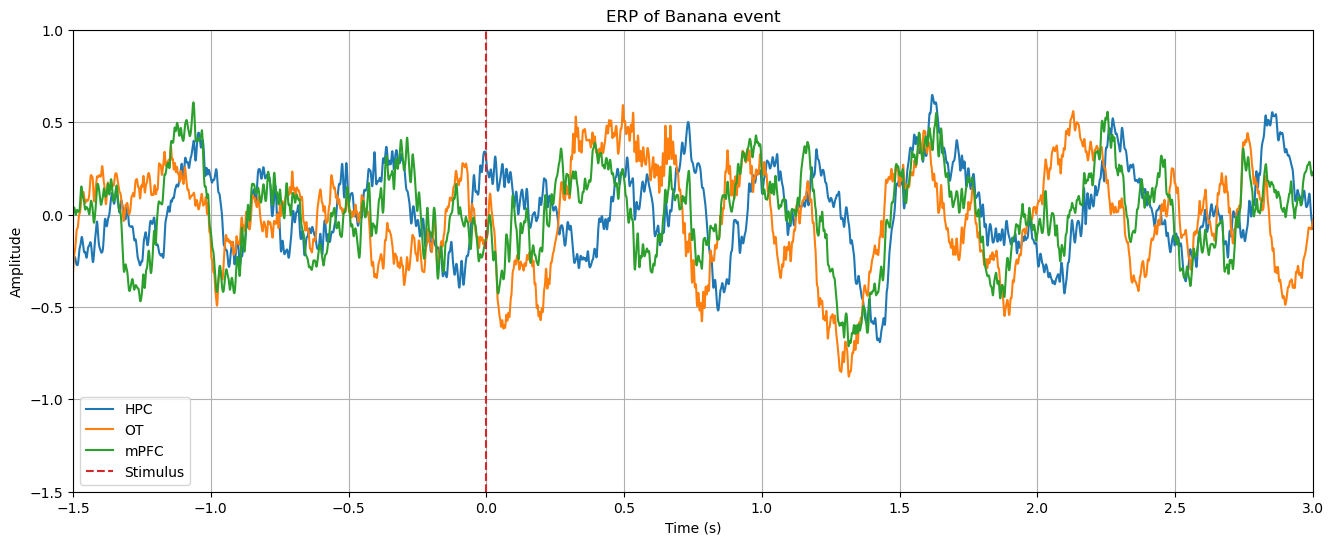

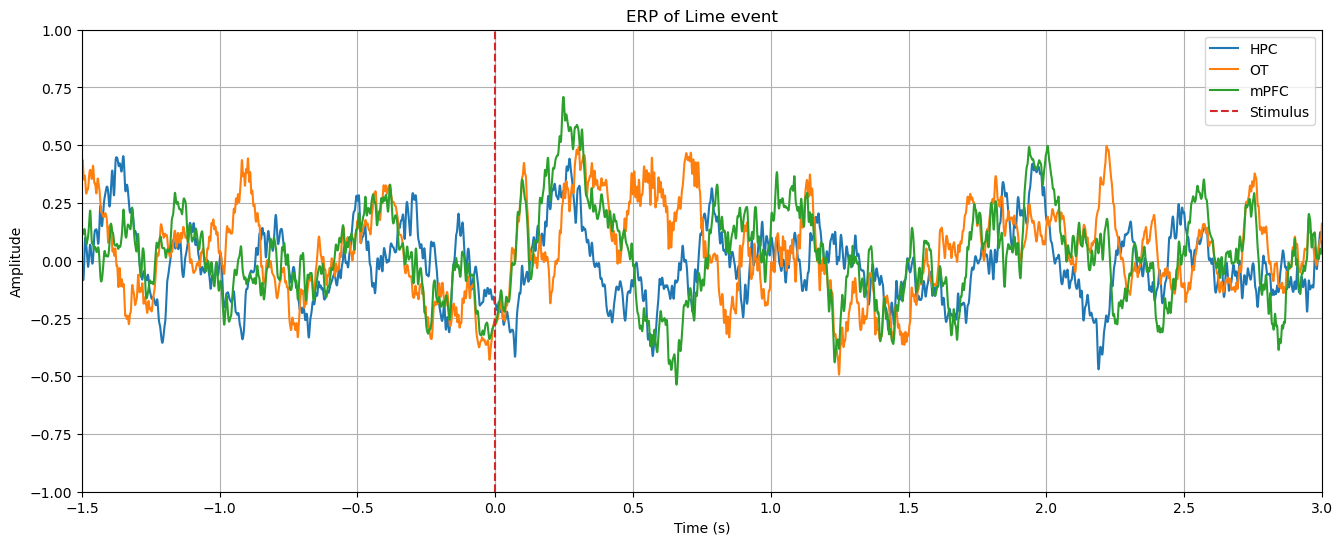

In [46]:

####################################################################
# To Do: Use your function to calculate the ERP and plot the results
ERPs = calc_ERP(data_epochs_z)

# Plotting
legends = data['channel_names']
legends[3] = 'Stimulus'
t = np.linspace(-1.5,3,9000)
plt.figure(figsize=(16,6))
plt.plot(t,ERPs[0][:,0])
plt.plot(t,ERPs[0][:,1])
plt.plot(t,ERPs[0][:,2])
plt.plot([0,0], [-1.5,1], linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ERP of Banana event")
plt.grid('True')
plt.xlim(-1.5,3)
plt.ylim(-1.5,1)
plt.legend(data['channel_names'])
plt.show

plt.figure(figsize=(16,6))
plt.plot(t,ERPs[1][:,0])
plt.plot(t,ERPs[1][:,1])
plt.plot(t,ERPs[1][:,2])
plt.plot([0,0], [-1,1], linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ERP of Lime event")
plt.grid('True')
plt.xlim(-1.5,3)
plt.ylim(-1,1)
plt.legend(legends)
plt.show
####################################################################


You should generate a plot like this for each odorant: <br>

![](./Figures/03-ERP-ban.png)

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [12]:
def PLV(window1,window2):
    phase_diff = np.angle(sp.signal.hilbert(window1)) - np.angle(sp.signal.hilbert(window2))
    plv = np.abs(np.mean(np.exp(1j * phase_diff)))
    return plv

def calc_PLV(data, frq_range, time_range, filt_order):
    ##############################
    # To Do: complete the function
    fs = 2000;
    numTrials_banana = len(data['data_Banana'])
    numTrials_lime = len(data['data_Lime'])
    epoch_filtered = np.zeros((numTrials_banana,9000,3))
    plv_final_banana = np.zeros((len(frq_range),2,3))
    stde_final_banana = np.zeros((len(frq_range),2,3))
    plv_final_lime = np.zeros((len(frq_range),2,3))
    stde_final_lime = np.zeros((len(frq_range),2,3))
    t = 0
    for f in frq_range:
        [b,a] = sp.signal.butter(filt_order, [(f-1)/ (fs/2) , (f+1)/ (fs/2)], btype='band')
        
        plv_banana = np.zeros((2,3))
        stde_banana = np.zeros((2,3))
        data_banana = np.zeros((2,3,numTrials_banana))
        for i in range(numTrials_banana):
            for j in range(3):
                epoch_filtered[i,:,j] = sp.signal.filtfilt(b,a,data['data_Banana'][i,:,j])
            data_banana[0,0,i] = PLV(epoch_filtered[i,0:time_range[1],0],epoch_filtered[i,0:time_range[1],1])
            data_banana[0,1,i] = PLV(epoch_filtered[i,0:time_range[1],0],epoch_filtered[i,0:time_range[1],2])
            data_banana[0,2,i] = PLV(epoch_filtered[i,0:time_range[1],1],epoch_filtered[i,0:time_range[1],2])
            data_banana[1,0,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],0],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],1])
            data_banana[1,1,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],0],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],2])
            data_banana[1,2,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],1],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],2])
        plv_banana = np.mean(data_banana,2)
        stde_banana = np.std(data_banana,2) / np.sqrt(numTrials_banana)
        
        plv_lime = np.zeros((2,3))
        stde_lime = np.zeros((2,3))
        data_lime = np.zeros((2,3,numTrials_banana))
        for i in range(numTrials_banana):
            for j in range(3):
                epoch_filtered[i,:,j] = sp.signal.filtfilt(b,a,data['data_Lime'][i,:,j])
            data_lime[0,0,i] = PLV(epoch_filtered[i,0:time_range[1],0],epoch_filtered[i,0:time_range[1],1])
            data_lime[0,1,i] = PLV(epoch_filtered[i,0:time_range[1],0],epoch_filtered[i,0:time_range[1],2])
            data_lime[0,2,i] = PLV(epoch_filtered[i,0:time_range[1],1],epoch_filtered[i,0:time_range[1],2])
            data_lime[1,0,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],0],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],1])
            data_lime[1,1,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],0],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],2])
            data_lime[1,2,i] = PLV(epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],1],epoch_filtered[i,time_range[1]:time_range[1]-time_range[0],2])
        plv_lime = np.mean(data_lime,2) 
        stde_lime = np.std(data_lime,2) / np.sqrt(numTrials_lime)

        plv_final_banana[t] = plv_banana
        stde_final_banana[t] = stde_banana
        plv_final_lime[t] = plv_lime
        stde_final_lime[t] = stde_lime
        t += 1
        
    return plv_final_banana,plv_final_lime,stde_final_banana,stde_final_lime   
    ##############################

In [13]:

####################################################################
# To Do: Use your function to calculate the PLV and plot the results
freqs = np.arange(20,60.5,0.5)
PLVs_banana,PLVs_lime,stde_banana,stde_lime = calc_PLV(data_epochs_z,freqs,[-3000,3000],4)
####################################################################


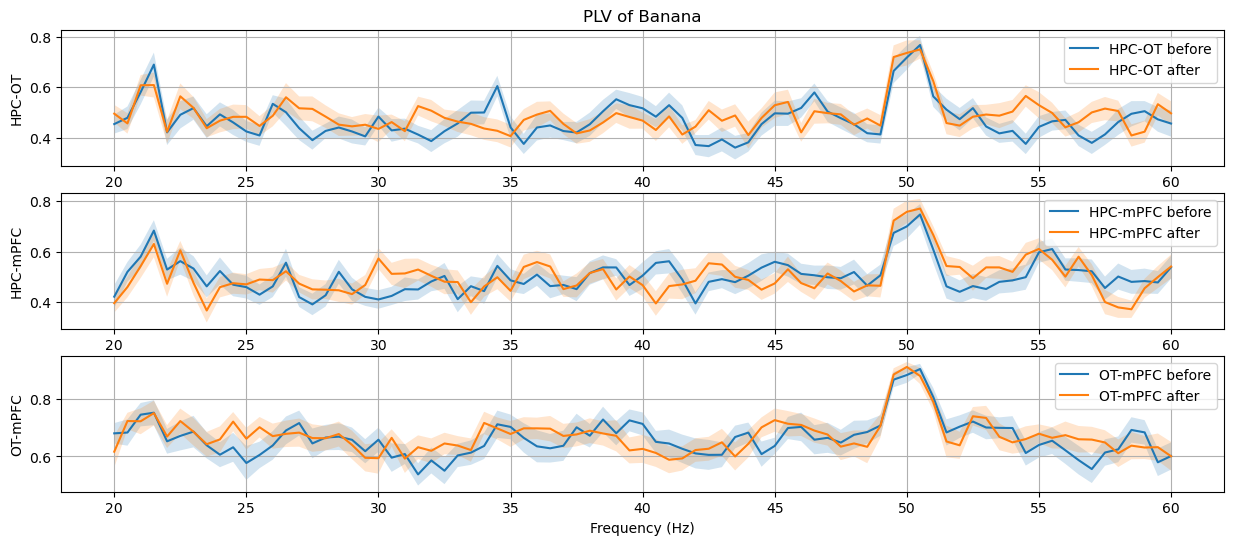

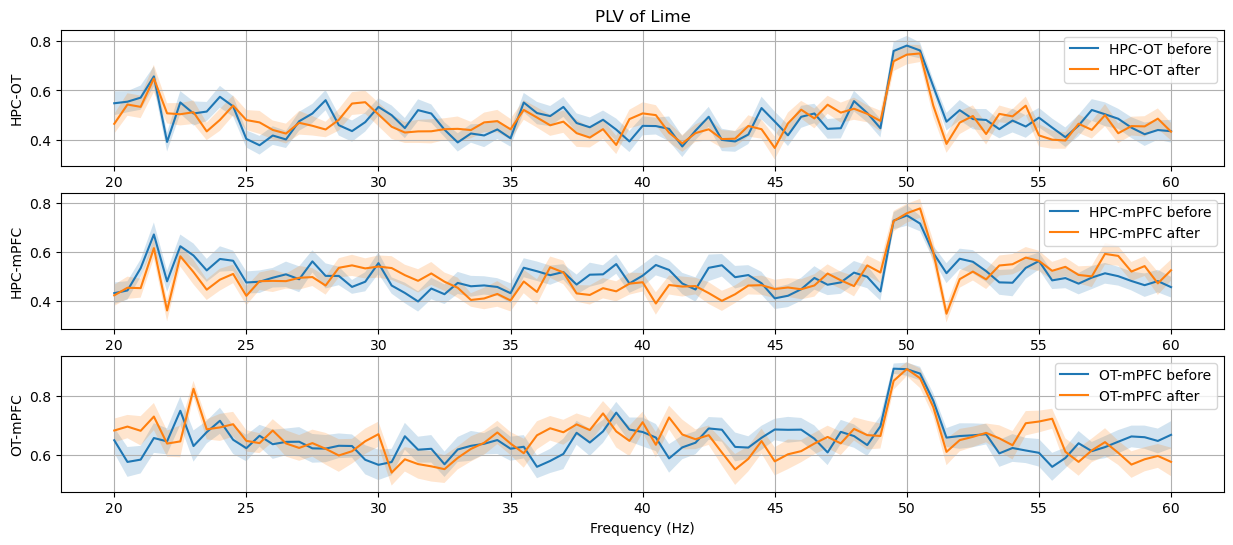

In [14]:
# Plotting PLV
names_plots = ['HPC-OT','HPC-mPFC','OT-mPFC']
names_legends = ['HPC-OT before','HPC-OT after','HPC-mPFC before','HPC-mPFC after','OT-mPFC before','OT-mPFC after']

plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(freqs,PLVs_banana[:,0,i])
    plt.plot(freqs,PLVs_banana[:,1,i])
    plt.fill_between(freqs, PLVs_banana[:,0,i]-stde_banana[:,0,i], PLVs_banana[:,0,i]+stde_banana[:,0,i], alpha=0.2)
    plt.fill_between(freqs, PLVs_banana[:,1,i]-stde_banana[:,1,i], PLVs_banana[:,1,i]+stde_banana[:,1,i], alpha=0.2)
    if i == 2:
        plt.xlabel("Frequency (Hz)")
    plt.ylabel(names_plots[i])
    if i == 0:
        plt.title("PLV of Banana")
    plt.grid('True')
    plt.legend(names_legends[2*i:2*i+2])
    plt.show 
    
plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(freqs,PLVs_lime[:,0,i])
    plt.plot(freqs,PLVs_lime[:,1,i])
    plt.fill_between(freqs, PLVs_lime[:,0,i]-stde_lime[:,0,i], PLVs_lime[:,0,i]+stde_lime[:,0,i], alpha=0.2)
    plt.fill_between(freqs, PLVs_lime[:,1,i]-stde_lime[:,1,i], PLVs_lime[:,1,i]+stde_lime[:,1,i], alpha=0.2)
    if i == 2:
        plt.xlabel("Frequency (Hz)")
    plt.ylabel(names_plots[i])
    if i == 0:
        plt.title("PLV of Lime")
    plt.grid('True')
    plt.legend(names_legends[2*i:2*i+2])
    plt.show 

<span style="color:pink">
We can see peaks in 50 hetrz in every calculated PLVs because of the line noise, but
there isn't any considerable difference between befor and after stimulus PLVs as seen in the plots. We can only guess that after stimulus signal has more energy in this frequency band, but it is not obvious or definite.

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/02-PLV.png)

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

<span style="color:pink">
Neural synchrony between oscillations across diferent frequency bands have been suggested as the major mechanism of neural integration. Different frequency bands are responsible for distinct computational roles as oscillations are thought to create synchronization across specialized brain regions to corroborate cognitive processing. Oscillations from diferent frequency bands are not isolated and independent; consequently, they can interact with each other in the form of modulation. This interaction of oscillations across diferent frequency bands is referred to as “cross-frequency coupling. <br>
Phase-amplitude coupling (PAC) is the most-studied type of cross-frequency coupling and is thought to be responsible for integration across populations of neurons. Low frequency brain activity controls the information exchange between brain regions by modulating the amplitude of the high frequency oscillations. PAC thus quantifes the modulation of the amplitude of high frequency oscillation, typically 30–100Hz, with the phase of slow rhythm, typically 5–12Hz. Disruption in PAC patterns has been linked to various neurological disorders, such as, autism spectrum disorder, schizophrenia, and Parkinson’s Disease. <br>
Conventional approach to PAC computation is composed of the following three steps: (1) bandpass fltering the input data into bands of interest, e.g., theta and gamma; (2) applying Hilbert transform to extract amplitude and phase time series from each frequency band of interest; and (3) quantifying the relationship between the phase and the amplitude time series. However, Hilbert transform based amplitude and phase estimations sufer from some shortcomings which can infuence the final PAC estimates and the subsequent neuroscientifc findings. <br>
For the last step in the pipeline for quantifying PAC, various indices quantifying the modulation between the phase and amplitude time series have been proposed. This relationship has been studied by mean vector length (MVL) which quantifes the circular variances through the magnitude of the mean of the complex composite signal, modulation index (MI) which quantifes the deviation of the phase-amplitude distribution from the uniform distribution through Kullback-Leibler divergence, and phase locking value (PLV) which computes the circular variance of the consistency of the phase diferences between the phase of the low frequency signal and the phase of the amplitude of the high frequency signal. <br>
PAC is defned as the modulation of the high frequency amplitude, A(t), with the phase, φ(t), of the low frequency components. The first step is to extract the envelope of the high frequency amplitude signal and the phase of the low frequency signal. We will use a recently introduced complex time frequency distribution, named Reduced Interference Rihaczek (RID-Rihaczek) time-frequency distribution, to extract both the phase and amplitude components of x(t) within the frequency bands of interest. Rihaczek defned the signal energy distribution in time and frequency using complex signal formulation. <br>
Afer detecting the amplitude and phase, we can use any existing method such as mean vector length (MVL), modulation index (MI) or phase locking value (PLV). As Suggested, MVL is more suitable for high SNR data as it is more sensitive to coupling strength and width compared to other two methods. This approach estimates PAC 
from a signal of length N, by mapping phase time series φ (t) and amplitude time series A(t) to a complex-valued vector at each time point, To quantify the coupling between fp and fa. MVL method measures the length of the average vector and computes PAC. <br>
Formulas can be seen in the papers suggested.

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [17]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally, 
    where the length of FFT is denoted as NFFT. In theory, when using FFT, 
    the signal in both time domain and frequency domain are discrete and periodic, 
    where the period is given by NFFT. Hence, if you specify an NFFT that is less 
    than the signal length, it actually introduces the aliasing in the time domain 
    and make the signal (even if its length is N>NFFT) periodic with NFFT. 
    When you take FFT of this sequence, you are working with this aliased sequence. 
    This is what datawrap do for you. 

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.** 

In [45]:
def calc_MVL(tfd1, tfd2, fph, famp):

    ##############################
    # To Do: complete the functions
    amplitude = np.abs(tfd2[famp,:])
    phase = np.angle(tfd1[fph,:])

    z = amplitude*np.exp(1j*phase)
    MVL = np.abs(np.mean(z))
    
    return MVL
    ##############################


def calc_PAC(data1,data2, fph_range, famp_range, time_range, step_l, step_h, method):

    ##############################
    # To Do: complete the function
    bins = int(2000/step_h)
    scale_h = 1/step_h
    scale_l = 1/step_l
    
    tfd1 = rid_rihaczek(data1[time_range[0]:time_range[1]],bins)
    tfd2 = rid_rihaczek(data2[time_range[0]:time_range[1]],bins)
    
    highFreqs = np.linspace(famp_range[0],famp_range[1]+step_h,int(40/step_h + 1))
    lowFreqs = np.linspace(fph_range[0],fph_range[1]+step_l,int(4/step_l + 1))
    
    N_amp = len(highFreqs)
    N_ph = len(lowFreqs)
    
    PACs = np.zeros((N_ph,N_amp));
    for i in range(N_ph):
        for j in range(N_amp):
            if method == 'MVL':
                PACs[i,j] = calc_MVL(tfd1,tfd2,int(lowFreqs[i]*scale_l),int(highFreqs[j]*scale_h))
            elif method == 'MI':
                PACs[i,j] = calc_MI(tfd1,tfd2,int(lowFreqs[i]*scale_l),int(highFreqs[j]*scale_h))

    return PACs,lowFreqs,highFreqs
    ##############################


In [56]:

####################################################################
# To Do: Use your function to calculate the PAC and plot the results
step_l = 1
step_h = 1
N_ph = int(4/step_l + 1)
N_amp = int(40/step_h + 1)

# l-PAC
PAC_local_banana_befor = np.zeros((3,N_ph,N_amp))
PAC_local_lime_befor = np.zeros((3,N_ph,N_amp))
PAC_local_banana_after = np.zeros((3,N_ph,N_amp))
PAC_local_lime_after = np.zeros((3,N_ph,N_amp))
for i in range(3):
    PAC_local_banana_befor[i],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,i],ERPs[0][:,i],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
    PAC_local_lime_befor[i],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,i],ERPs[1][:,i],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
    PAC_local_banana_after[i],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,i],ERPs[0][:,i],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')
    PAC_local_lime_after[i],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,i],ERPs[1][:,i],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')
    
# ir-PAC
PAC_ir_banana_befor = np.zeros((3,N_ph,N_amp))
PAC_ir_lime_befor = np.zeros((3,N_ph,N_amp))
PAC_ir_banana_after = np.zeros((3,N_ph,N_amp))
PAC_ir_lime_after = np.zeros((3,N_ph,N_amp))

PAC_ir_banana_befor[0],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,0],ERPs[0][:,1],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_befor[0],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,0],ERPs[1][:,1],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_banana_after[0],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,0],ERPs[0][:,1],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_after[0],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,0],ERPs[1][:,1],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')

PAC_ir_banana_befor[1],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,0],ERPs[0][:,2],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_befor[1],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,0],ERPs[1][:,2],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_banana_after[1],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,0],ERPs[0][:,2],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_after[1],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,0],ERPs[1][:,2],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')

PAC_ir_banana_befor[2],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,1],ERPs[0][:,2],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_befor[2],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,1],ERPs[1][:,2],[4,8],[20,60],[int(0.5*data['srate']),int(1.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_banana_after[2],phFreqs,ampFreqs = calc_PAC(ERPs[0][:,1],ERPs[0][:,2],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')
PAC_ir_lime_after[2],phFreqs,ampFreqs = calc_PAC(ERPs[1][:,1],ERPs[1][:,2],[4,8],[20,60],[int(1.5*data['srate']),int(2.5*data['srate'])],step_l,step_h,'MVL')

####################################################################


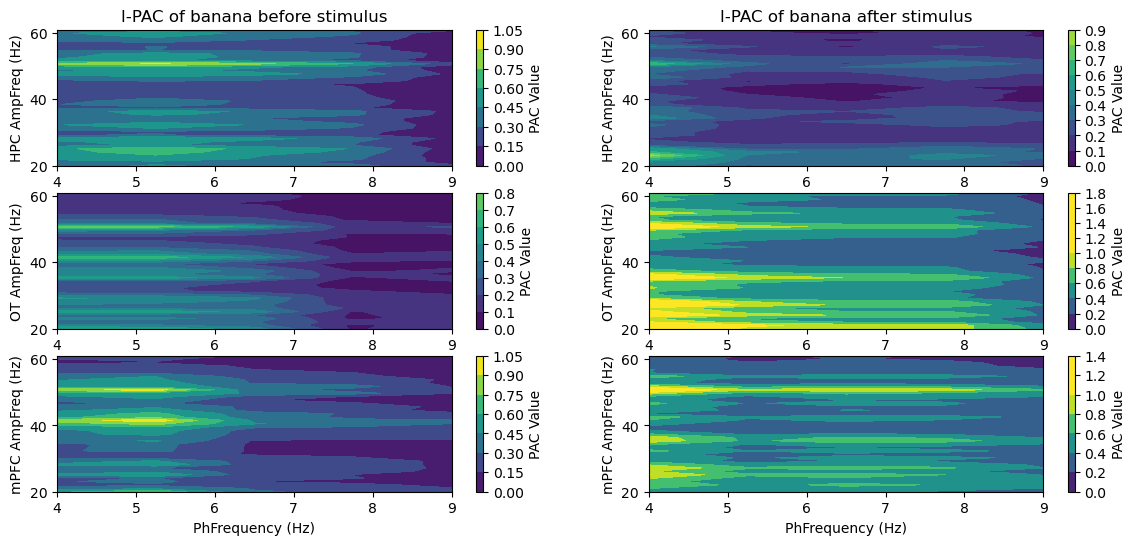

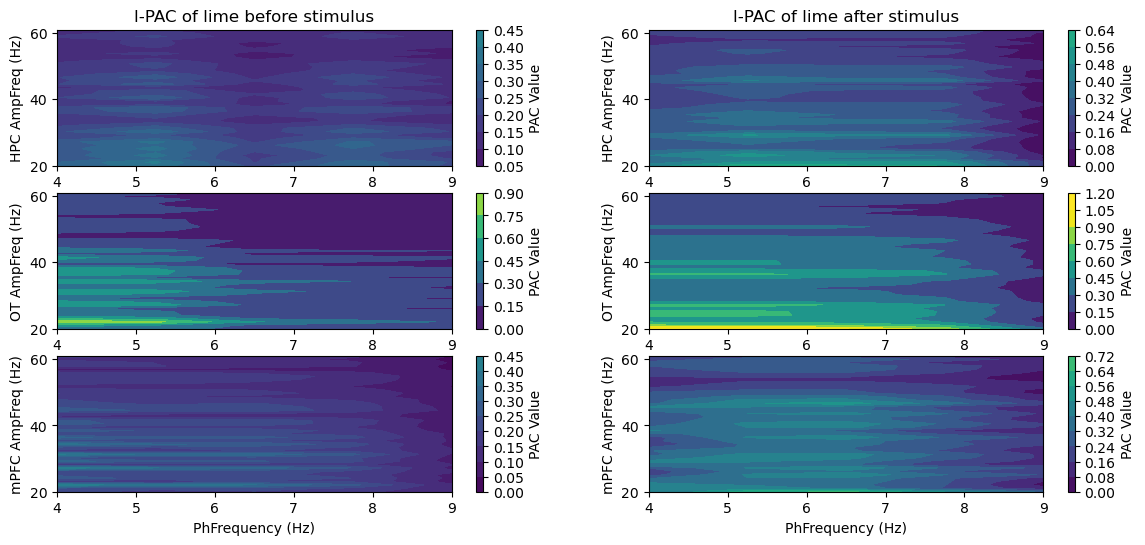

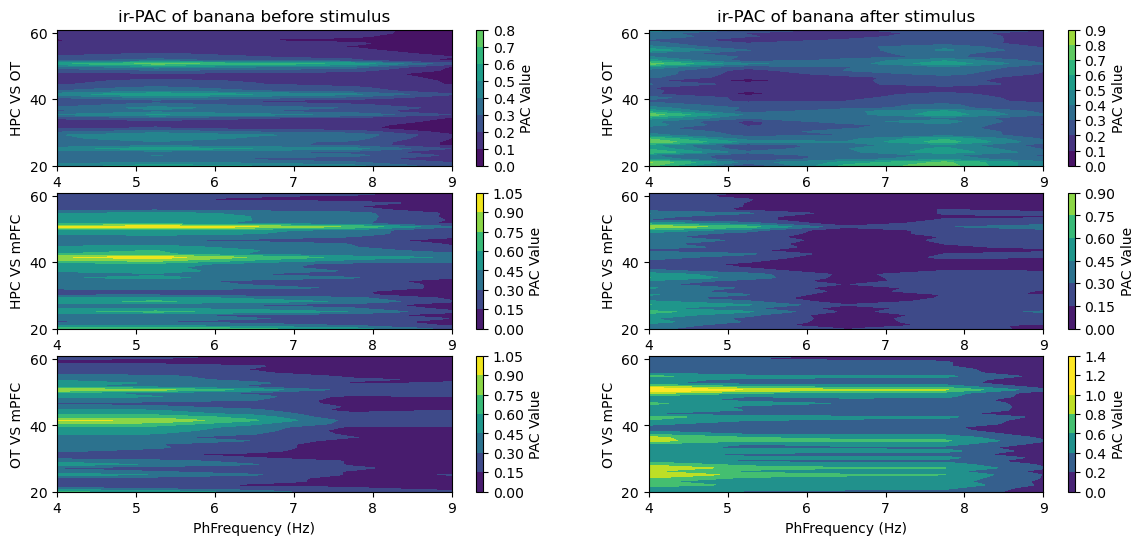

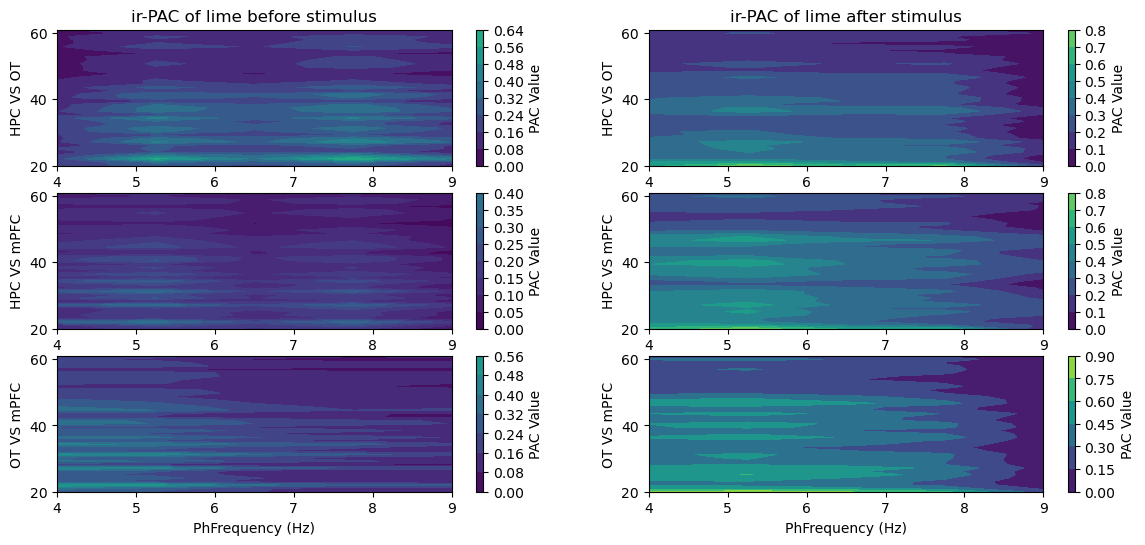

In [66]:
ampFreqs_mesh,phFreqs_mesh = np.meshgrid(ampFreqs, phFreqs)

# Plotting l-PAC
plt.figure(figsize=(14, 6))
for i in range(3):
    plt.subplot(3,2,(i+1)*2-1)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_local_banana_befor[i], cmap='viridis' , vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
    if i == 0:
        plt.title('l-PAC of banana before stimulus')
    plt.subplot(3,2,(i+1)*2)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_local_banana_after[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
    if i == 0:
        plt.title('l-PAC of banana after stimulus')
    plt.colorbar(label='PAC Value')
plt.show()

plt.figure(figsize=(14, 6))
for i in range(3):
    plt.subplot(3,2,(i+1)*2-1)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_local_lime_befor[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
    if i == 0:
        plt.title('l-PAC of lime before stimulus')
    plt.subplot(3,2,(i+1)*2)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_local_lime_after[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
    if i == 0:
        plt.title('l-PAC of lime after stimulus')
    plt.colorbar(label='PAC Value')
plt.show()


# Plotting ir-PAC
plt.figure(figsize=(14, 6))
for i in range(3):
    plt.subplot(3,2,(i+1)*2-1)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_ir_banana_befor[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('ir-PAC of banana before stimulus')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    plt.subplot(3,2,(i+1)*2)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_ir_banana_after[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('ir-PAC of banana after stimulus')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    plt.colorbar(label='PAC Value')
plt.show()

plt.figure(figsize=(14, 6))
for i in range(3):
    plt.subplot(3,2,(i+1)*2-1)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_ir_lime_befor[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('ir-PAC of lime before stimulus')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    plt.subplot(3,2,(i+1)*2)
    plt.contourf(phFreqs_mesh, ampFreqs_mesh, PAC_ir_lime_after[i], cmap='viridis', vmin = 0, vmax = 1)
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 2:
        plt.xlabel('PhFrequency (Hz)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('ir-PAC of lime after stimulus')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    plt.colorbar(label='PAC Value')
plt.show()



<span style="color:pink">
In both local and inter regional PACs we can see changes in PAC amounts befor and after stimulus. In l-PACs we can see that PAC amounts after stimulus are more than befor the stimulus in higher phase frequencies but lowe in 5 to 6 Hz, but there is difference between banana and lime. <br>
Based on ir-PAC plots, there is a small increase in PAC betweens regions for most of the plots. There is a considerable PAC increase between Hippocampus and OT in banana stimulus and We can also see same results for OT and mPFC for lime stimulus.

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/04-PAC-comodulo.png) <br>
*figure description: comodulogram of hippocampus theta phase and hippocampus low gamma amplitude*

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [49]:
def calc_tvPAC(data1,data2, fph_range, famp_range, t_win, overlap, step_l, step_h, method):

    ##############################
    # To Do: complete the function
    time_range = np.arange(0,int((3-t_win)*data['srate'])+1,int(t_win*(1-overlap)*data['srate']))
    N_ph = int(4/step_l + 1)
    N_amp = int(40/step_h + 1)

    # l-PAC
    tvPAC = np.zeros((len(time_range),N_ph,N_amp))
    tvPAC_mean = np.zeros((len(time_range),N_amp))
    num = 0
    for t in time_range:
        tvPAC[num],phFreqs,ampFreqs = calc_PAC(data1,data2,fph_range,famp_range,[t,t + int(t_win*data['srate'])] ,step_l,step_h,method)
        tvPAC_mean[num] = np.mean(tvPAC[num],0)
        num += 1
    return tvPAC_mean
    ##############################


In [50]:
step_l = 1
step_h = 1
t_win = 0.25
overlap = 0.75
time_range = np.arange(0,int((3-t_win)*data['srate'])+1,int(t_win*(1-overlap)*data['srate']))
T = len(time_range)
N_ph = int(4/step_l + 1)
N_amp = int(40/step_h + 1)

# l-tvPAC
tvPAC_local_banana = np.zeros((3,T,N_amp))
tvPAC_local_lime = np.zeros((3,T,N_amp))
for i in range(3):
    tvPAC_local_banana[i] = calc_tvPAC(ERPs[0][:,i],ERPs[0][:,i],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
    tvPAC_local_lime[i] = calc_tvPAC(ERPs[1][:,i],ERPs[1][:,i],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
        
# ir-tvPAC
tvPAC_ir_banana = np.zeros((3,T,N_amp))
tvPAC_ir_lime = np.zeros((3,T,N_amp))
tvPAC_ir_banana[0] = calc_tvPAC(ERPs[0][:,0],ERPs[0][:,1],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
tvPAC_ir_banana[1] = calc_tvPAC(ERPs[0][:,0],ERPs[0][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
tvPAC_ir_banana[2] = calc_tvPAC(ERPs[0][:,1],ERPs[0][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
tvPAC_ir_lime[0] = calc_tvPAC(ERPs[1][:,0],ERPs[1][:,1],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
tvPAC_ir_lime[1] = calc_tvPAC(ERPs[1][:,0],ERPs[1][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')
tvPAC_ir_lime[2] = calc_tvPAC(ERPs[1][:,1],ERPs[1][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MVL')

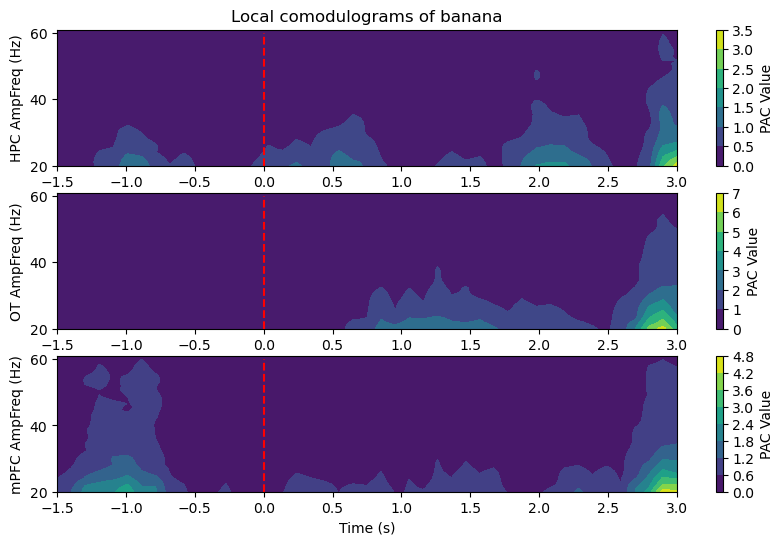

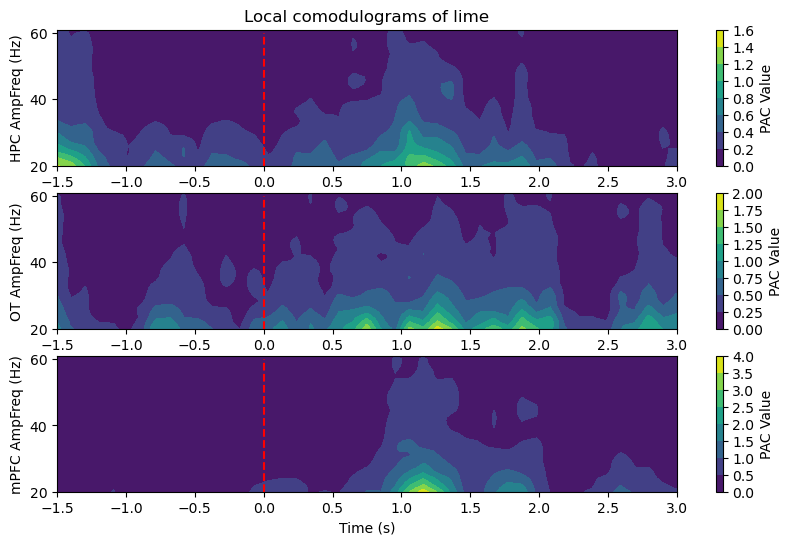

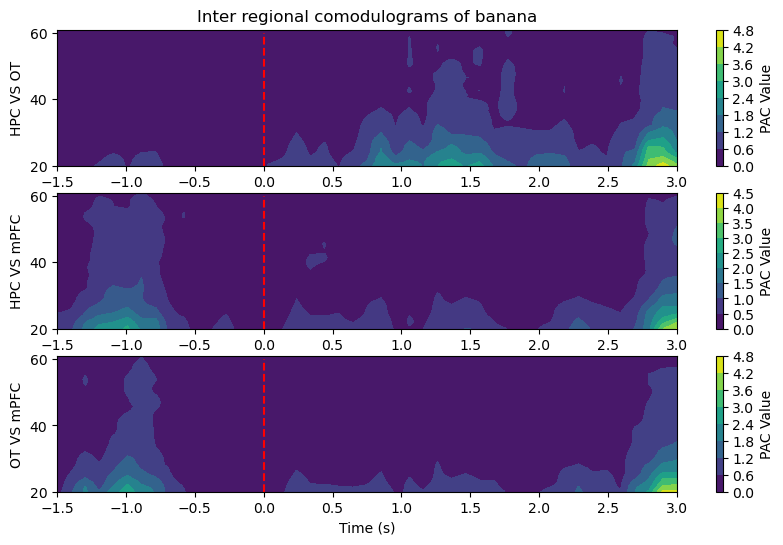

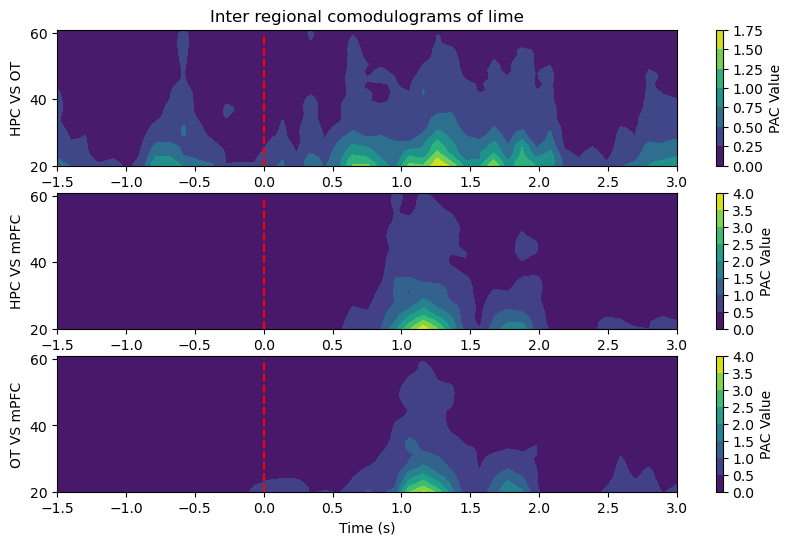

In [68]:
time = np.linspace(-1.5,3,len(time_range))
ampFreqs_mesh,time_mesh = np.meshgrid(ampFreqs, time)

# Plotting l-PAC
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_local_banana[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 0:
        plt.title('Local comodulograms of banana')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_local_lime[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 0:
        plt.title('Local comodulograms of lime')
plt.show()


# Plotting ir-PAC
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_ir_banana[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('Inter regional comodulograms of banana')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_ir_lime[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('Inter regional comodulograms of lime')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
plt.show()

<span style="color:pink">
In local and inter regional PACs of banana stimulus, there is a big increase at third second after the stimulus but in Lime it is the same for about first to second second. In ir-PAC, we can see connection between HC and OT more than other plots. It is the same for lime stimulus but also OT vs mPFC and HPC vs mPFC have connections based on their plots. <br>
So ut can be confered that there can be connections between regions and the regions themselves based on low frequency phase and high frequency amplitude coupling. 

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/05-PAC-vtime.png)<br>
*figure description: tv-PAC of hippocampus theta phase and hippocampus low gamma amplitude*

# Bonus: Modulation Index (MI) `+10 Points`

The Mean Vector Length (MVL) is not the only method for calculating Phase-Amplitude Coupling (PAC); another alternative is the Modulation Index (MI). You can find a detailed explanation of this method in [this paper](https://doi.org/10.1073/pnas.0810524105).

Simply implement the MI method and compute the time-varying PAC (tv-PAC) for each channel (l-PAC) and between channels (ir-PAC) using **ERP signals**. Then, compare the results with the MVL method used in the previous section. *`7 Points`*

`Theoretical Question:` In [this paper](https://doi.org/10.3389/fnins.2019.00573), different methods for calculating PAC and PLV and Generalized-Linear-Modeling-Cross-Frequency-Coupling (GLM) are evaluated. After reading the paper, determine when we should use MVL or MI for calculating PAC. *`3 Points`*

In [106]:
def calc_MI(tfd1, tfd2, fph, famp):

    ##############################
    # To Do: complete the functions
    amplitude = np.abs(tfd2[famp,:])
    phase = np.angle(tfd1[fph,:])
    N_ph = len(phase)
    N_amp = len(amplitude)
    
    phHist,_ = np.histogram(phase,int(np.sqrt(N_ph)),density=True)
    ampHist,_ = np.histogram(amplitude,int(np.sqrt(N_amp)),density=True)
    jointHist,_,_ = np.histogram2d(phase,amplitude,[int(np.sqrt(N_ph)),int(np.sqrt(N_amp))],density=True)

    phProb = phHist / np.sum(phHist)
    ampProb = ampHist / np.sum(ampHist)
    jointProb = jointHist / np.sum(jointHist)
    
    MI = np.sum(np.nan_to_num(jointProb*np.log(ampProb/(np.outer(phProb,ampProb)))))
    return MI
    ##############################
    

In [107]:

####################################################################
# To Do: Use your function to calculate the PAC and plot the results
step_l = 1
step_h = 1
t_win = 0.25
overlap = 0.75
time_range = np.arange(0,int((3-t_win)*data['srate'])+1,int(t_win*(1-overlap)*data['srate']))
T = len(time_range)
N_ph = int(4/step_l + 1)
N_amp = int(40/step_h + 1)

# l-tvPAC
tvPAC_local_banana_MI = np.zeros((3,T,N_amp))
tvPAC_local_lime_MI = np.zeros((3,T,N_amp))
for i in range(3):
    tvPAC_local_banana_MI[i] = calc_tvPAC(ERPs[0][:,i],ERPs[0][:,i],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
    tvPAC_local_lime_MI[i] = calc_tvPAC(ERPs[1][:,i],ERPs[1][:,i],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
        
# ir-tvPAC
tvPAC_ir_banana_MI = np.zeros((3,T,N_amp))
tvPAC_ir_lime_MI = np.zeros((3,T,N_amp))
tvPAC_ir_banana_MI[0] = calc_tvPAC(ERPs[0][:,0],ERPs[0][:,1],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
tvPAC_ir_banana_MI[1] = calc_tvPAC(ERPs[0][:,0],ERPs[0][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
tvPAC_ir_banana_MI[2] = calc_tvPAC(ERPs[0][:,1],ERPs[0][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
tvPAC_ir_lime_MI[0] = calc_tvPAC(ERPs[1][:,0],ERPs[1][:,1],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
tvPAC_ir_lime_MI[1] = calc_tvPAC(ERPs[1][:,0],ERPs[1][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
tvPAC_ir_lime_MI[2] = calc_tvPAC(ERPs[1][:,1],ERPs[1][:,2],[4,8],[20,60],t_win,overlap,step_l,step_h,'MI')
####################################################################


C:\Users\Zahedi\AppData\Local\Temp\ipykernel_9860\3770658739.py:19: RuntimeWarning: divide by zero encountered in true_divide
  MI = np.sum(np.nan_to_num(jointProb*np.log(ampProb/(np.outer(phProb,ampProb)))))
C:\Users\Zahedi\AppData\Local\Temp\ipykernel_9860\3770658739.py:19: RuntimeWarning: invalid value encountered in multiply
  MI = np.sum(np.nan_to_num(jointProb*np.log(ampProb/(np.outer(phProb,ampProb)))))
C:\Users\Zahedi\AppData\Local\Temp\ipykernel_9860\3770658739.py:19: RuntimeWarning: invalid value encountered in true_divide
  MI = np.sum(np.nan_to_num(jointProb*np.log(ampProb/(np.outer(phProb,ampProb)))))


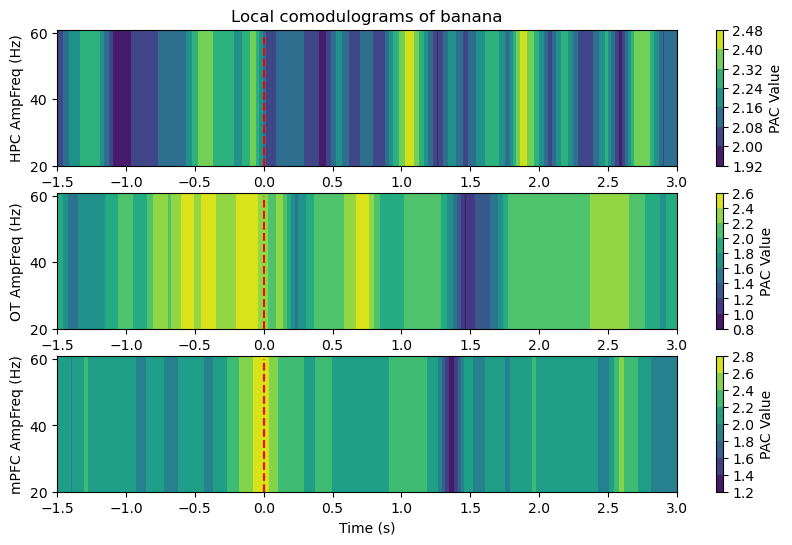

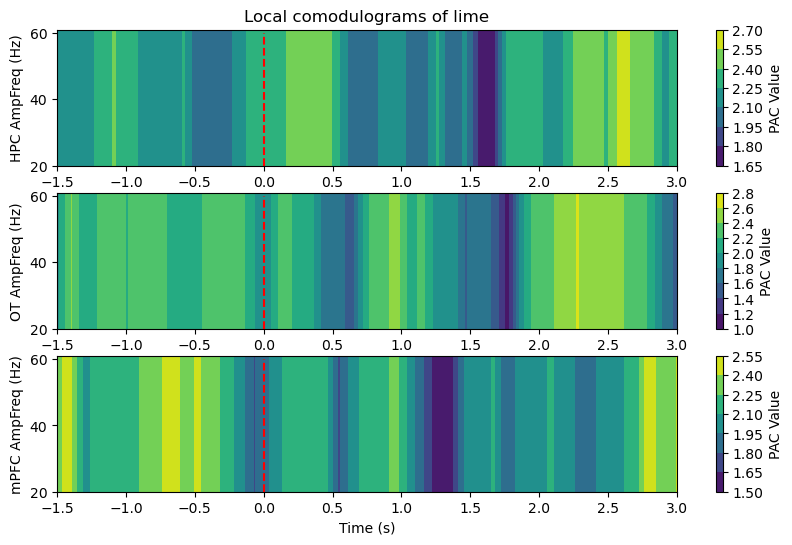

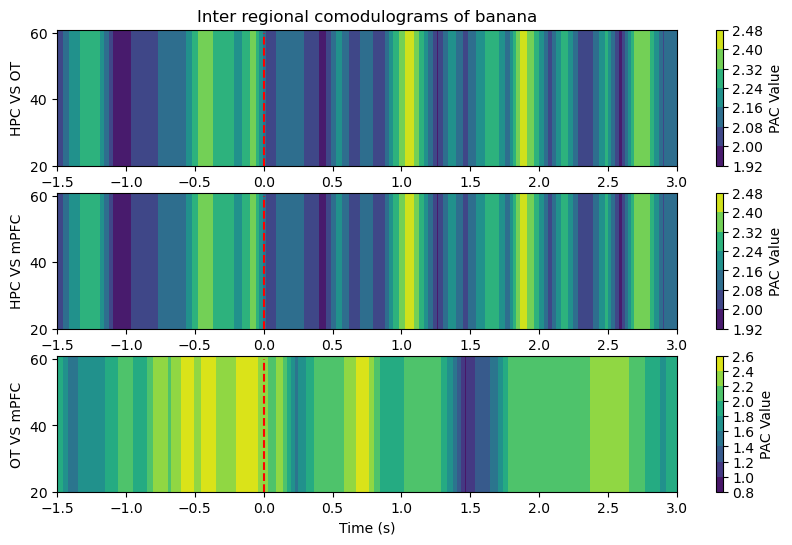

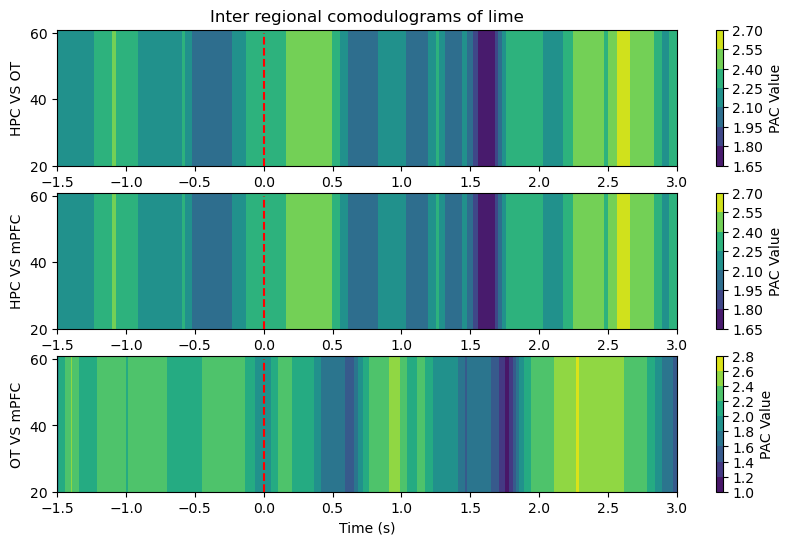

In [109]:
time = np.linspace(-1.5,3,len(time_range))
ampFreqs_mesh,time_mesh = np.meshgrid(ampFreqs, time)

# Plotting l-PAC
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_local_banana_MI[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 0:
        plt.title('Local comodulograms of banana')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_local_lime_MI[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
    plt.ylabel(data['channel_names'][i] + ' AmpFreq (Hz)')
    if i == 0:
        plt.title('Local comodulograms of lime')
plt.show()


# Plotting ir-PAC
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_ir_banana_MI[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('Inter regional comodulograms of banana')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.contourf(time_mesh, ampFreqs_mesh, tvPAC_ir_lime_MI[i], cmap='viridis')
    plt.plot([0,0], [20,60], linestyle='dashed' , color='red')
    plt.colorbar(label='PAC Value')
    if i == 2:
        plt.xlabel('Time (s)')
        plt.ylabel(data['channel_names'][1] + ' VS ' + data['channel_names'][2])
    if i == 1:
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][2])
    if i == 0:
        plt.title('Inter regional comodulograms of lime')
        plt.ylabel(data['channel_names'][0] + ' VS ' + data['channel_names'][1])
plt.show()